In [6]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
from matplotlib import pyplot as plt
import re

## Leo los archivos con los posteos 
El primero tiene 1 fila por cada usuario y en la columna AllText el texto de todos sus posteos concatenados por un espacio.
El segundo tiene 1 fila por cada posteo y en la columna AllText el texto correspondiente únicamente a ese posteo.

In [2]:
usuarios = pd.read_csv("datasets/usuarios2020_sinrt_3redes.csv")
usuarios.shape

(150, 15)

In [3]:
posts = pd.read_csv("datasets/usuarios_posts.csv")
posts.head()

,index,User_Name,AllText,red,Likes,Comments,lado
0,0,cristinafkirchner,Despidiéndome de @florenciakf antes de volver ...,ig,259673,17182,FT
1,1,cristinafkirchner,Mucha tristeza... Mucha. Se fue un grande.\nHa...,ig,250854,6860,FT
2,2,cristinafkirchner,Lo primero que tenemos que hacer para poder pa...,ig,233211,11443,FT
3,4,cristinafkirchner,#AsambleaLegislativa2020,ig,162254,4605,FT
4,5,cristinafkirchner,"Que la lealtad a las convicciones, al pueblo y...",ig,151857,9236,FT


In [4]:
posts.shape

(84435, 7)

### Sanitizo el texto de los posteos

In [7]:
texts = list(posts[pd.notna(posts.AllText)].AllText.str.lower())
remuve1 = r'\bCambiar la configuración Ver' #saco esta frase que se repite mucho
remuve2 = r'\b\xa0mil'  #saco esta palabra
remuve3 = r'\breproducciones'  #saco esta palabra
remuve4 = r"\d\:|\.\d|:\d|\d"  #saco los numeros
remuve5 = r'http\S+'   #saco las urls
remuve6 = r'http\:\/\/.*?(?=\s)'   #saco las urls
remuve7 = r'\w+\.com\s?'  #saco las urls
remove8= r'\babro hilo\b' #saco los RT
remove9= r'\bhilo\b'
remove10= r'(@[A-Za-z0-9]+)' #saco el resto de los arrobas

texts = [re.sub(remuve1 + '|' + remuve2 + '|' + remuve3 + '|' + remuve4 + '|' + remuve5 + '|' + remuve6 + '|' + remuve7+'|'+ remove8 + '|' + remove9 + '|' + remove10  , '', t) for t in texts]
texts2 = list(texts)

### Entreno Top2Vec sobre los textos

In [ ]:

model = Top2Vec(texts2)

### Chequeo cuantos tópicos detectó

In [157]:
model.get_num_topics()

1028

### Guardo el modelo

In [ ]:
model.save("top2vecPostsModel")

In [8]:
model = Top2Vec.load("top2vecPostsModel")

### Identifico el principal tópico discutido en cada post y lo agrego al dataframe de posteos en una columna nueva llamada "topic1"

In [9]:
posts['topic1']=-1

In [10]:
for i in range(0,len(texts2)):
    topic_nums,topic_score,topics_words,word_scores = model.get_documents_topics([i], num_topics=3)
    posts.loc[i,'topic1']=topic_nums[0][0]    

### Para estimar de que se trata cada tópico observamos sus principales palabras mediante una nube de palabras y luego vemos los 20 principales posts al respecto.
### En este ejemplo utilizamos el tópico 3, al que identificamos como "Condolencias por fallecimientos"

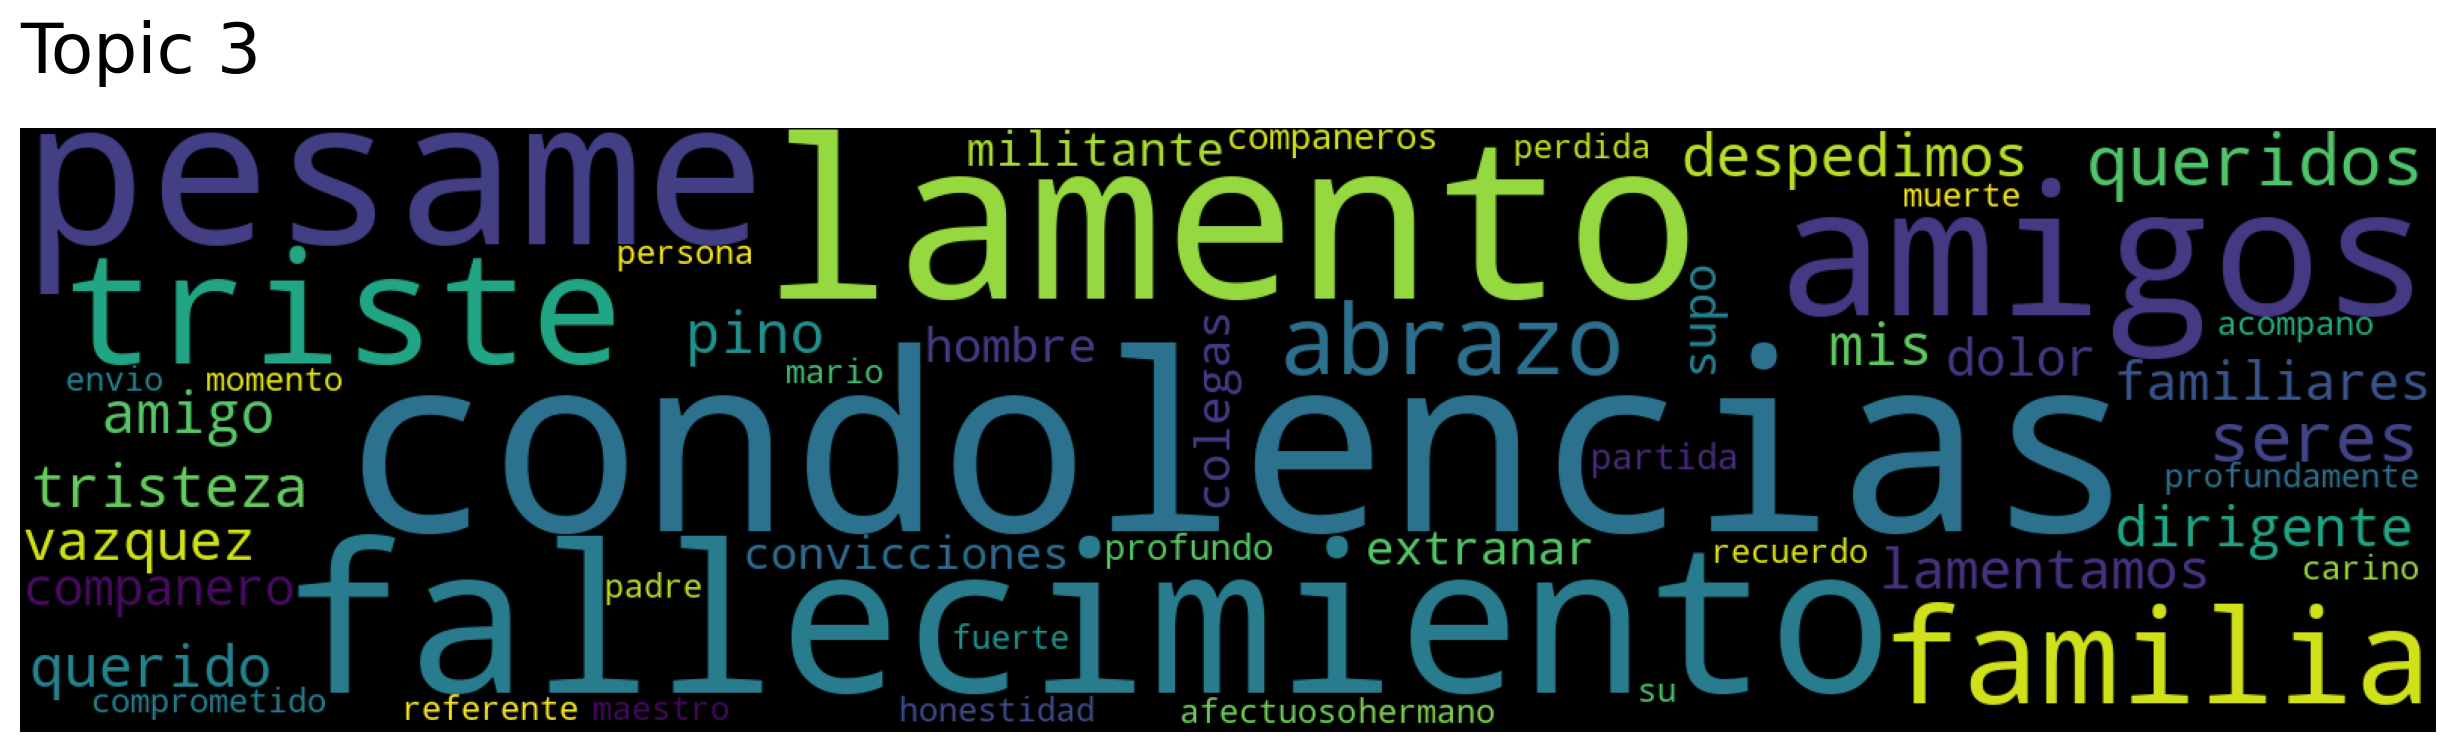

In [12]:
model.generate_topic_wordcloud(3)

In [13]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=20)
posts.loc[document_ids]

,index,User_Name,AllText,red,Likes,Comments,lado,topic1
78732,80622,luisnaidenoff,Mis condolencias a familiares y amigos por el ...,tw,42,1,PRO,3
81459,83349,jorgemacri,Lamento el fallecimiento del Juez Claudio Bona...,tw,534,20,PRO,3
79923,81813,elisacarrio,"Falleció Tabaré Vásquez, gran Presidente urugu...",tw,1833,32,PRO,3
79047,80937,SchiavoniH,Lamento profundamente el fallecimiento de Herm...,tw,6,1,PRO,3
79276,81166,diegosantilli,Con mucho pesar lamento la partida del gran pe...,tw,192,8,PRO,3
69001,70891,gracielaocana,Enorme perdida. Braian Toledo era un ejemplo d...,tw,294,12,PRO,3
78919,80809,luisnaidenoff,Lamento el fallecimiento del juez Claudio Bona...,tw,396,19,PRO,3
76824,78714,horaciorlarreta,Mis más sentidas condolencias a la familia del...,tw,4877,464,PRO,3
76676,78566,horaciorlarreta,Enorme tristeza por la muerte de Mario Pereyra...,tw,1437,75,PRO,3
53110,54648,Maxiferraro,Lamento el fallecimiento de Hermes Binner. Nue...,tw,144,1,PRO,3
